# TP 5 : Réseaux de Neurones en tensorflow

**Avant de commencer :** Merci de bien lire le préambule et l'énoncé de ce TP. Ça vous évitera de perdre beaucoup de temps ensuite. 

**Rendu :** Ce TP doit être déposé sur elearning. Le rendu doit contenir uniquement le fichier `.ipynb`. Le notebook doit être propre, le plus illustré et le plus commenté possible. 

**Librairies :** Ce TP repose sur les librairies standard suivantes :
- Version numpy : 1.23.1
- Version matplotlib : 3.5.2
- Version tensorflow : 2.8.2

Pour vérifier qu'elles sont bien installées dans votre environnement de travail, lancez la cellule suivante. Elle ne doit pas renvoyer d'erreur (un `Warning` n'est en général pas trop embêtant). 

Pour les numéros _exacts_ de version, ce n'est pas très grave s'il y a une petite différence (par exemple `numpy 1.22` au lieu de `1.23`), mais si vous avez une trop grosse différence (par exemple `sklearn 0.23` au lieu de `sklearn 1.1`), mettez à jour votre librairie. 

S'il vous manque une librairie (`No module named ...`), vous pouvez l'installer 
- Soit en utilisant votre gestionnaire d'environnement (p.ex. `conda`). 
- Soit directement depuis le notebook, en faisant
```
!pip install nom_de_la_librairie==numero_de_la_version
```

**Attention :** Pour installer tensorflow, vous pouvez _a priori_ faire `pip install tensorflow`, mais en cas de doute, vous pouvez regarder [la doc d'installation](https://www.tensorflow.org/install/pip?hl=fr).

Pour `tensorflow`, assurez-vous de bien avoir la version `2.` (la suite ne devrait pas avoir trop d'importance). 

Note : la première fois que vous lancer `import tensorflow as tf`, ça peut prendre assez longtemps (des choses sont compilées en C en arrière plan). 

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf

from utils_tp5 import *

print("Version numpy :", np.__version__)
print("Version matplotlib :", matplotlib.__version__)
print("Version tensorflow :", tf.__version__)

Version numpy : 2.0.2
Version matplotlib : 3.10.0
Version tensorflow : 2.18.0


## Partie 1 : premiers modèles en tensorflow

Le but de cette partie est de vous faire créer des modèles simples en `tensorflow` et en `pytorch`, les deux librairies de références en _Deep Learning_, et de mettre en place les routines pour entraîner de tels modèles en fonction des deux librairies. 

### Jeux de données

On commence par se fabriquer deux jeux de données sur lesquels on testera nos modèles de Deep Learning : un jeu de régression, et un jeu de classification. Les fonctions pour faire ça sont dans un fichier `utils_tp5.py` que vous n'êtes pas obligés d'ouvrir. 

In [61]:
x_reg_train, y_reg_train, x_reg_test, y_reg_test = generate_regression_task()
x_classif_train, y_classif_train, x_classif_test, y_classif_test = generate_classification_task()

On visualise ça. 

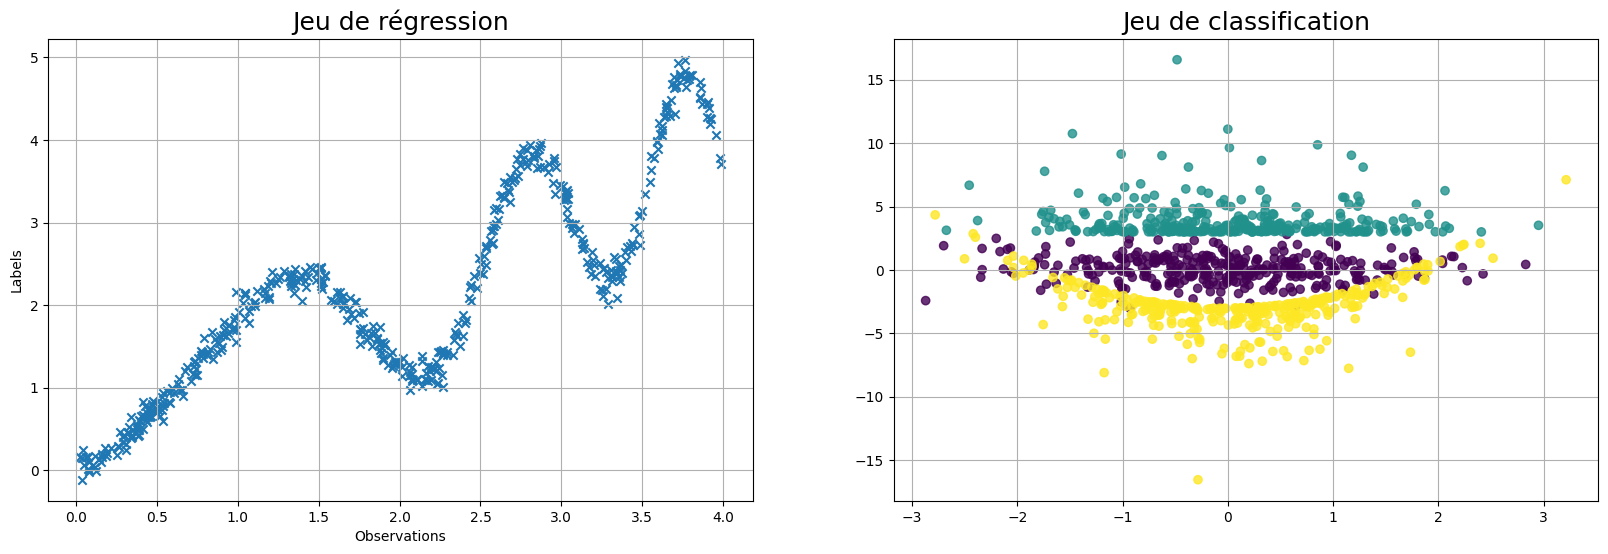

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

ax = axs[0]

ax.scatter(x_reg_train, y_reg_train, marker='x')
ax.set_xlabel("Observations")
ax.set_ylabel("Labels")
ax.set_title("Jeu de régression", fontsize=18)
ax.grid()

ax = axs[1]
ax.scatter(x_classif_train[:,0], x_classif_train[:,1], c=y_classif_train, alpha=0.8)
ax.set_title("Jeu de classification", fontsize=18)
ax.grid()

### Régression en tensorflow

**Question 1: Construction du modèle.** Remplir le code suivant pour créer un modèle `tensorflow` pour le jeu de classification de la manière suivante : 

- Le modèle prend les entrées du jeu de régression (1D) et utilise un fully-connected (`Dense`) pour les plonger en dimension 3, avec une activation `relu`
- Le modèle fait une autre couche qui va de la dimension 3 à a dimension 5, avec une `relu` encore. 
- Le modèle remet ensuite les données en dimension 1 (la dimension des labels), avec une activation `linear` (ce qui revient à prendre $\sigma = \mathrm{id}$). 

_Indications:_ On utilisera la syntaxe 
```
tf.keras.layers.Dense(units, activation)
```
où `units` et la dimension de _sortie_ du layer, et `activation` est le choix de la fonction d'activation $\sigma$, qui peut valoir `'relu'`, `'sigmoid'` ou `'softmax'` par exemple. 

Pour le premier layer, on ajoutera le paramètre `input_shape = (1,)`, pour préciser que l'entrée du modèle sera en 1D (attention, la syntaxe est un peu pénible : `tensorflow` demande un itérable (une liste, un tuple, etc.), donc on est obligé de mettre `(1,)` et pas simplement `1`). 

In [69]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

---

**Compilation du modèle.** Avant exécution, les modèles tensorflow doivent être "compilés", grâce à la méthode `model.compile(optimizer, loss, metrics)`. On va alors préciser 
- `optimizer` : le choix de l'algorithme d'optimisation. On prendra `'adam'`, un grand classique pour faire une déscente de gradient stochastique
- `loss` : le choix de la _loss function_. On prendra la _mean squared error_ (mse), qu'on peut fixer en mettant le paramètre `loss` à `'mse'`.
- `metrics` : la quantité qui nous intéresse. On prendra ici aussi la `'mse'` (voir la partie sur la classification pour comprendre la différence). 

In [70]:
model.compile(
    optimizer='adam', 
    loss='mse', 
    metrics=['mse']
)

**Question 2: Résumé du modèle.** Après avoir lancé la cellule précédente (compilation du modèle), appeler la méthode `model.summary()` pour répondre aux questions suivantes : 
- Combien votre modèle a-t-il de paramètres ? 
- Justifier ce nombre par le calcul.

In [71]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 5)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32 (128.00 B)

 Trainable params: 32 (128.00 B)

 Non-trainable params: 0 (0.00 B)

- **Le modèle a 32 paramètres**
    - Couche 1 : 6 paramètres
    - Couche 2 : 20 paramètres
    - Couche 3 : 6 paramètres

**Question 4 : Entraîner le modèle.** En utilisant la méthode `model.fit` dont la doc est disponible [ici](https://www.tensorflow.org/api_docs/python/tf/keras/Model), entraîner le modèle sur votre jeu de régression. On rappelle que `epochs` indique le nombre de parcours _complet_ du jeu de données que vous voulez faire lors de votre Descente de Gradient Stochastique (par batch). 

On prendra 5 epochs pour commencer. 

In [72]:
model.fit(x_reg_train, y_reg_train, epochs=5)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 6.1805 - mse: 6.1805
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9882 - mse: 5.9882 
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7044 - mse: 5.7044 
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7967 - mse: 5.7967 
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9017 - mse: 5.9017 


---

**Question 5: Évaluer le modèle.** Tester la performance de votre model avec la méthode `model.evaluate(x_test, y_test)`. On ajoutera comme paramètre à la méthode, `verbose = 2` (qui permet d'avoir directement + de renseignements). 

Commentez brièvement les résultats obtenus. 

In [73]:
# doc : Returns the loss value & metrics values for the model in test mode
# on peut donc récupérer directement dans des varibales loss et mse
loss, mse = model.evaluate(x_reg_test, y_reg_test, verbose=2)
print()
print(f"Loss: {loss:.4f}")
print(f"MSE: {mse:.4f}")

7/7 - 0s - 30ms/step - loss: 5.6107 - mse: 5.6107

Loss: 5.6107
MSE: 5.6107


Le modèle à une **MSE** (Mean Squarred Error) de **4,5**

Le modèle n'a pas l'air performant

---

**Visualiser le modèle.** Comme on est en basse dimension (observations et labels de dimension 1), on peut visualiser "globalement" les prédictions que ferait notre modèle en générant "toutes" les observations possibles en 1D susceptibles de nous intéresser. 

Concrètement, on va échantillonner l'intervalle $[0, 4]$ (raisonnable vues nos observations), puis on regarde les prédictions du modèle avec `model.predict(x)`. 

**Question 6:** Exécutez le code suivant puis commentez le résultat obtenu. 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


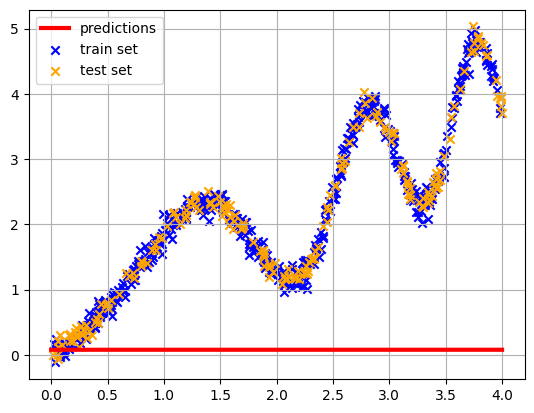

In [74]:
t = np.linspace(0, 4, 10000)  # on fabrique "tout" l'intervalle

pred = model.predict(t)

fig, ax = plt.subplots()
ax.plot(t, pred, c='red', label='predictions', linewidth = 3)
ax.scatter(x_reg_train, y_reg_train, marker='x', label='train set', c='blue')
ax.scatter(x_reg_test, y_reg_test, marker='x', label='test set', c='orange')
ax.legend()
ax.grid()

- Les prédictions sont très mauvaises
- On peut supposer que cela est due à de l'underfitting liée à l'utilisation de seulement 5 parcours complets du jeu de données (epochs = 5)

---

**Question 7:** Relancer l'entraînement du modèle en faisant + d'epochs, et (en faisant un copier-coller) relancez le code de la cellule précédente pour visualiser notre modèle "mieux entraîné". 

Commentez le résultat obtenu.

_Remarque:_ Un point assez pratique avec `tensorflow` et qu'on peut simplement "reprendre" l'entraînement en relançant `model.fit(..., epoch=...)`: l'objet `model` est conservé, donc si vous lancez deux fois la cellule `model.fit(..., epoch = 5)`, c'est comme si vous aviez fait 10 epochs. Par contre, si vous relancez `model = ...` (ou si vous redémarrez votre notebook), vous remettez le modèle à 0 bien entendu. 

_Remarque 2:_ Il se peut que votre modèle "stagne" près de la fonction nulle. Dans ce cas, relancez-le "depuis 0". 

In [120]:
# premier essais: 
    # epochs: 5 + 20 + 20 + 20 + 20 + 20 + 5
    # pas de changements après 25 epochs
    # MSE : 0,344
    
# deuxième essais: 
    # epochs: 200
    # MSE : 0,429
    
# deuxième essais: 
    # epochs: 1000
    # MSE : 1,5

In [137]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(
    optimizer='adam', 
    loss='mse', 
    metrics=['mse']
)

In [138]:
model.fit(x_reg_train, y_reg_train, epochs=50)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 6.3188 - mse: 6.3188
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.1473 - mse: 6.1473
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.1742 - mse: 6.1742
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.0924 - mse: 6.0924
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.8148 - mse: 5.8148
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.7679 - mse: 5.7679
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.6795 - mse: 5.6795
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.4754 - mse: 5.4754
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.6142 - mse: 5.6142
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.3652 - mse: 5.3652
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.2001 - mse: 5.2001
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.0389 - mse: 5.0389
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms

In [139]:
loss, mse = model.evaluate(x_reg_test, y_reg_test, verbose=2)
print()
print(f"Loss: {loss:.4f}")
print(f"MSE: {mse:.4f}")

7/7 - 0s - 39ms/step - loss: 0.4820 - mse: 0.4820

Loss: 0.4820
MSE: 0.4820


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


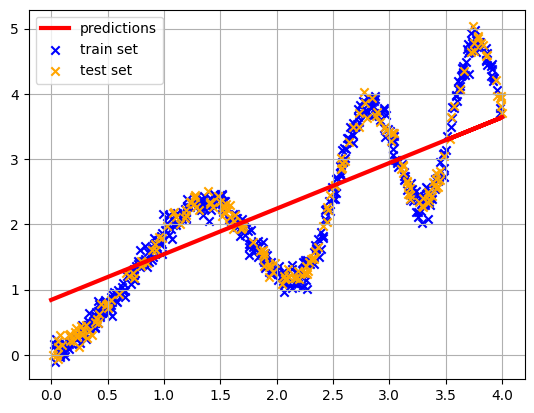

In [140]:
t = np.linspace(0, 4, 10000)  # on fabrique "tout" l'intervalle

pred = model.predict(t)

fig, ax = plt.subplots()
ax.plot(t, pred, c='red', label='predictions', linewidth = 3)
ax.scatter(x_reg_train, y_reg_train, marker='x', label='train set', c='blue')
ax.scatter(x_reg_test, y_reg_test, marker='x', label='test set', c='orange')
ax.legend()
ax.grid()

Notre modèle à l'air bien plus performant après plus de parcours du jeu de données, **MSE = 0,35** mais les prédictions restent assez mauvaises

Cependant un très grand nombre de parcours (par exemple 1000) n'a pas l'air d'apporter des prédictions beaucoup plus précises que pour 25/50 epochs

---

_A priori_, votre modèle est toujours assez mauvais. Ce n'était donc pas une question de nombre d'epochs, mais véritablement d'expressivité du modèle : notre réseau est trop simple. 

**Question 8;** Fabriquer un nouveau réseau de neurones (appelez-le par exemple `model2`) similaire au précédent, mais en augmentant son expressivité via : 
- plus de neurones dans les layers intermédiaires
- plus de layers intermédiaires
- augmenter le nombre d'epochs si besoin

Reprendre ensuite les questions précédentes, en particulier :
- Décrire le nombre de paramètres de votre nouveau modèle,
- Entraîner votre modèle, d'abord pour seulement quelqus epochs, puis + si nécessaire
- Visualisez votre modèle. 

Commentez les résultats que vous obtenez au cours de vos essais. 

**Objectif :** avoir une training **et** une test _mse_ $< 0.05$. 

**Consigne supplémentaire :** N'hésitez pas à forcer un peu sur les paramètres, **mais** votre réseau doit obligatoirement prendre **moins de 5 minutes pour s'entraîner** (appel de `model.fit`) sur un CPU de laptop ordinaire. 

In [177]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model2.summary()


model2.compile(
    optimizer='adam', 
    loss='mse', 
    metrics=['mse']
)

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_129 (Dense)               │ (None, 256)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,289 (173.00 KB)

 Trainable params: 44,289 (173.00 KB)

 Non-trainable params: 0 (0.00 B)

In [178]:
model2.fit(x_reg_train, y_reg_train, epochs=300)

Epoch 1/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 3.7868 - mse: 3.7868
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6918 - mse: 0.6918
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4701 - mse: 0.4701
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4239 - mse: 0.4239
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4232 - mse: 0.4232
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4306 - mse: 0.4306
Epoch 7/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4205 - mse: 0.4205
Epoch 8/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4235 - mse: 0.4235
Epoch 9/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4204 - mse: 0.4204
Epoch 10/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4092 - mse: 0.4092
Epoch 11/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4203 - mse: 0.4203
Epoch 12/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3905 - mse: 0.3905
Epoch 13/300
16/16 ━━━━━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1700 - mse: 0.1700
Epoch 73/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2082 - mse: 0.2082
Epoch 74/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1954 - mse: 0.1954
Epoch 75/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2208 - mse: 0.2208
Epoch 76/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2161 - mse: 0.2161
Epoch 77/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1991 - mse: 0.1991
Epoch 78/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1981 - mse: 0.1981
Epoch 79/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2069 - mse: 0.2069
Epoch 80/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1968 - mse: 0.1968
Epoch 81/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1710 - mse: 0.1710
Epoch 82/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1816 - mse: 0.1816
Epoch 83/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2125 - mse: 0.2125
Epoch 84/300
16/16 ━━━━━━━━━━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0339 - mse: 0.0339 
Epoch 143/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0316 - mse: 0.0316 
Epoch 144/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0305 - mse: 0.0305 
Epoch 145/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0230 - mse: 0.0230 
Epoch 146/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0314 - mse: 0.0314 
Epoch 147/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0378 - mse: 0.0378 
Epoch 148/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0415 - mse: 0.0415 
Epoch 149/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0387 - mse: 0.0387 
Epoch 150/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0326 - mse: 0.0326 
Epoch 151/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0318 - mse: 0.0318 
Epoch 152/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0317 - mse: 0.0317 
Epoch 153/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0285 - mse: 0.0285 
Epoch 154/300
16/1

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0169 - mse: 0.0169
Epoch 213/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0147 - mse: 0.0147
Epoch 214/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0235 - mse: 0.0235
Epoch 215/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0401 - mse: 0.0401
Epoch 216/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0366 - mse: 0.0366
Epoch 217/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0295 - mse: 0.0295
Epoch 218/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0475 - mse: 0.0475
Epoch 219/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0410 - mse: 0.0410
Epoch 220/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0245 - mse: 0.0245
Epoch 221/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0183 - mse: 0.0183
Epoch 222/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0314 - mse: 0.0314
Epoch 223/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0230 - mse: 0.0230
Epoch 224/300
16/16 ━━━━━━━━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0358 - mse: 0.0358 
Epoch 283/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0242 - mse: 0.0242
Epoch 284/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0181 - mse: 0.0181
Epoch 285/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0152 - mse: 0.0152
Epoch 286/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mse: 0.0136
Epoch 287/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0132 - mse: 0.0132
Epoch 288/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0139 - mse: 0.0139
Epoch 289/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0172 - mse: 0.0172
Epoch 290/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0134 - mse: 0.0134
Epoch 291/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0167 - mse: 0.0167
Epoch 292/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0244 - mse: 0.0244
Epoch 293/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0193 - mse: 0.0193 
Epoch 294/300
16/16 ━━━

In [181]:
loss, mse = model2.evaluate(x_reg_test, y_reg_test, verbose=2)
print()
print(f"Loss: {loss:.4f}")
print(f"MSE: {mse:.4f}")

7/7 - 0s - 22ms/step - loss: 0.0116 - mse: 0.0116

Loss: 0.0116
MSE: 0.0116


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


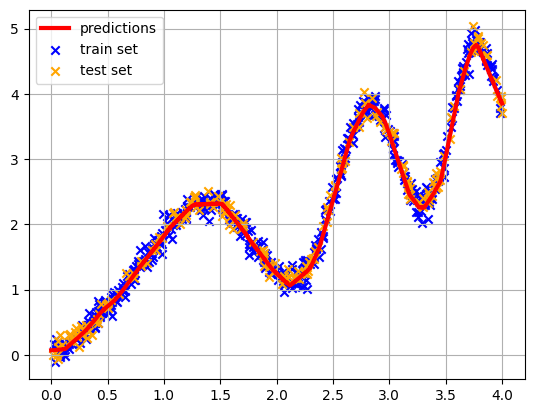

In [182]:
t2 = np.linspace(0, 4, 10000)  # on fabrique "tout" l'intervalle

pred2 = model2.predict(t2)

fig, ax = plt.subplots()
ax.plot(t2, pred2, c='red', label='predictions', linewidth = 3)
ax.scatter(x_reg_train, y_reg_train, marker='x', label='train set', c='blue')
ax.scatter(x_reg_test, y_reg_test, marker='x', label='test set', c='orange')
ax.legend()
ax.grid()

- Le modèle utilise **44,289 paramètres**
- Avec un entrainement sur 300 epochs on finit par obtenir **MSE: 0.0116**
- On observe aussi sur le graphe que les prédictions se confondent aux jeu de données de test et de training
- **Notre modèle est donc très performant**

```py 
# Exemple de configuration testé qui finissait pas être trop lourde / non performante
# Cela donnait environ 180 000 paramètres
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model2.fit(x_reg_train, y_reg_train, epochs=100)
# Les performances n'étaient pas convaincantes, j'ai donc pris la décisions d'enlever un layer réduisant considérablement le nombre de paramètres, et d'utiliser plus d'epochs
```

---

### Classification en tensorflow

On passe maintenant à la classification. Le principe reste le même que pour la régression, avec trois différences : 
- En classification, on utilise comme `loss` (la fonction qu'on veut minimiser) l'entropie croisée, mais comme `metrics` (la valeur qu'on interprête / qu'on veut communiquer) l'`accuracy` (proportion de prédictions correctes). On utilisera ici `loss = tf.keras.losses.SparseCategoricalCrossentropy()`
- Pour pouvoir utiliser l'entropie croisée, il faut en théorie utiliser le _one-hot_encoding_ des labels. En réalité, `tensorflow` gère cela automatiquement avec la  `SparseCategoricalCrossentropy()`. 
- Lorsqu'on appelle `model.predict(x)`, on récupère _une distribution de probabilité sur l'ensemble des classes_ (donc un vecteur de taille `nombre_de_classes`). Pour récuperer une "vraie" prédiction, il faut faire `np.argmax(model.predict(x), axis=1)` (qui permet de sélectionner la classe qui a la plus haute probabilité estimée par le modèle). 

**Question 1:** Initialiser un réseau de neurone avec seulement deux layers : 
- Le premier envoie les observations en dimension 10, avec une activation `sigmoid`
- Le deuxième envoie les observation en dimension 3, avec une activation `softmax`. 

In [211]:
model_classification = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_classification.summary()

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_157 (Dense)               │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63 (252.00 B)

 Trainable params: 63 (252.00 B)

 Non-trainable params: 0 (0.00 B)

---

**Question 2:** Pourquoi a-t-on pris une dimension de 3 pour la sortie du deuxième (et dernier) layer ? Pourquoi a-t-on pris l'activation `softmax` ?

Dans le premier graphe **jeu de classification** on voit que l'on a 3 classes différentes (jaune, violet, bleu). La dimension 3 sert donc a représenter la probabilité d'appartenir à chaque classe

`SoftMax`assure que la somme des valeurs de sortie soit égale à 1, cela est donc utile pour avoir une représentation sous forme de probabilité

---

**Question 3:** Compilez votre modèle. On prendra toujours `'adam'` comme `optimizer`, mais on prendra comme indiqué la `SparseCategoricalCrossentropy()` comme `loss`, et `['accuracy']` comme `metrics`.

In [212]:
model_classification.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

---

**Question 4:** Entraînez votre modèle sur 5 epochs, évaluez son score (sur le jeu de test), et commentez vos résultats. On fournit notamment une cellule de code pour visualiser l'ensemble des prédictions sur une grille $[-15, 15]\times[-5,5]$ de votre modèle après entraînement. 

In [213]:
model_classification.fit(x_classif_train, y_classif_train, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6417 - loss: 1.0390
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6965 - loss: 0.9786
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6899 - loss: 0.9366
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7297 - loss: 0.8897
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7541 - loss: 0.8437


In [217]:
loss, accuracy = model_classification.evaluate(x_classif_test, y_classif_test, verbose=2)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy * 100:.2f}%")

32/32 - 0s - 8ms/step - accuracy: 0.7370 - loss: 0.8150
Test loss: 0.8150
Test accuracy: 73.70%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


Text(0.5, 1.0, "Prédictions du modèle (ombre) vs données d'entraînement")

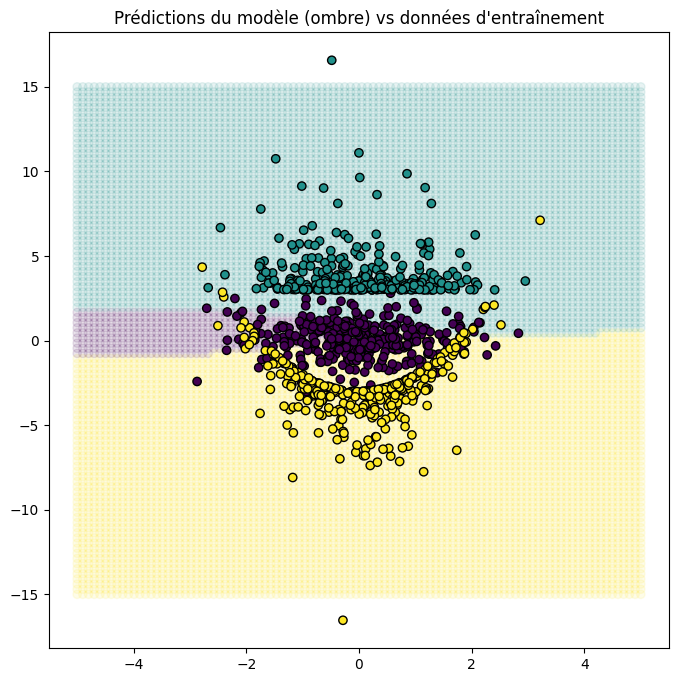

In [215]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-15, 15, 100)
grid = np.array(np.meshgrid(x,y)).reshape(2, 10000).T  # On fabrique une grille sur laquelle on va tester notre modèle
pred_proba = model_classification.predict(grid)  # on évalue notre modèle sur la grille --> donne des probabilité d'appartenance
predictions = np.argmax(pred_proba, axis=-1)  # On récupère nos prédictions sous forme de classes

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(grid[:,0], grid[:,1], c=predictions, alpha = 0.1)
ax.scatter(x_classif_train[:,0], x_classif_train[:,1], c=y_classif_train, marker='o', edgecolor='k', label="train set")
ax.set_title("Prédictions du modèle (ombre) vs données d'entraînement")

---

**Question 5:** Essayer d'améliorer votre score (train et test !) avec un modèle plus raffiné. Attention à l'_overfiting_!

Objectif : accuracy $> 94\%$ sur train et test. 

In [287]:
model_classification2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_classification2.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model_classification2.summary()

model_classification2.fit(x_classif_train, y_classif_train, epochs=25)

Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_254 (Dense)               │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_255 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_256 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_257 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,851 (11.14 KB)

 Trainable params: 2,851 (11.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4520 - loss: 1.0942
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7048 - loss: 0.6610
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8387 - loss: 0.4347
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8701 - loss: 0.3705
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8835 - loss: 0.3157
Epoch 6/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9019 - loss: 0.2624
Epoch 7/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9062 - loss: 0.2464
Epoch 8/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9261 - loss: 0.2006
Epoch 9/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9179 - loss: 0.2130
Epoch 10/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9310 - loss: 0.1739
Epoch 11/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9235 - loss: 0.1898
Epoch 12/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9310 - l

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


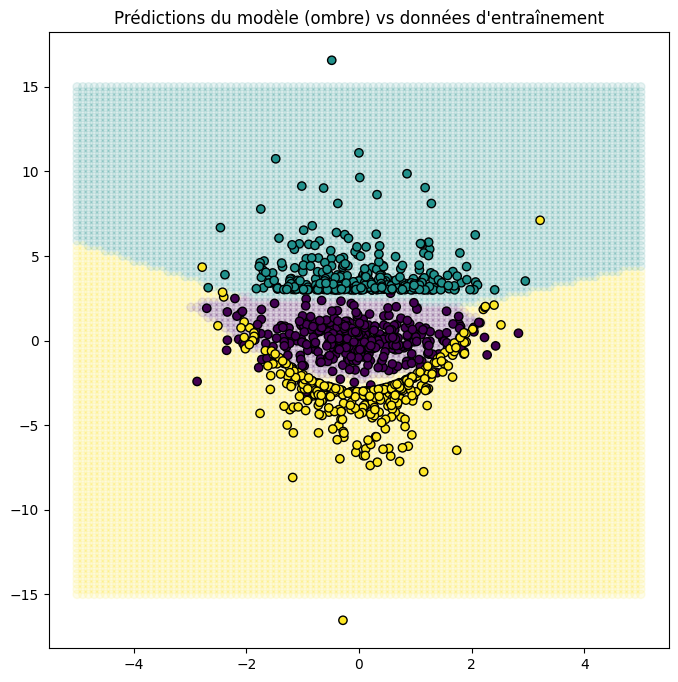

In [289]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-15, 15, 100)
grid = np.array(np.meshgrid(x,y)).reshape(2, 10000).T  # On fabrique une grille sur laquelle on va tester notre modèle
pred_proba = model_classification2.predict(grid)  # on évalue notre modèle sur la grille --> donne des probabilité d'appartenance
predictions = np.argmax(pred_proba, axis=-1)  # On récupère nos prédictions sous forme de classes

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(grid[:,0], grid[:,1], c=predictions, alpha = 0.1)
ax.scatter(x_classif_train[:,0], x_classif_train[:,1], c=y_classif_train, marker='o', edgecolor='k', label="train set")
ax.set_title("Prédictions du modèle (ombre) vs données d'entraînement")
plt.show()

In [290]:
print("# " * 50)

loss, accuracy = model_classification2.evaluate(x_classif_train, y_classif_train, verbose=2)
print(f"Train loss: {loss:.4f}")
print(f"Train accuracy: {accuracy * 100:.2f}%")

print("# " * 50)

loss, accuracy = model_classification2.evaluate(x_classif_test, y_classif_test, verbose=2)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy * 100:.2f}%")

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
32/32 - 0s - 7ms/step - accuracy: 0.9460 - loss: 0.1411
Train loss: 0.1411
Train accuracy: 94.60%
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
32/32 - 0s - 8ms/step - accuracy: 0.9500 - loss: 0.1292
Test loss: 0.1292
Test accuracy: 95.00%


---

## Partie 2 : Le jeu CIFAR10 et les réseaux convolutionnels

On va maintenant tester de nouvelles architectures sur un classique des jeux de données : le jeu `CIFAR10`. C'est un jeu de données représentant des images (attention il est un peu volumineux, essayez d'avoir un peu de place sur votre machine avant de lancer la cellule de code suivant qui le téléchargera). 

Les images ont $32 \times 32$ pixels et troix canaux de couleur (Rouge, Bleu, Vert) qui prennent des valuers entre $0$ et $255$, et qu'on va normaliser à $[0,1]$ pour simplifier. 

Ces images sont réparties dans 10 classes, dont les noms sont stockés dans la liste `noms_classes` ci-dessous :

In [4]:
noms_classes = ['avion', 'voiture', 'oiseau', 'chat', 'cerf',
               'chien', 'grenouille', 'cheval', 'bateau', 'camion']


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

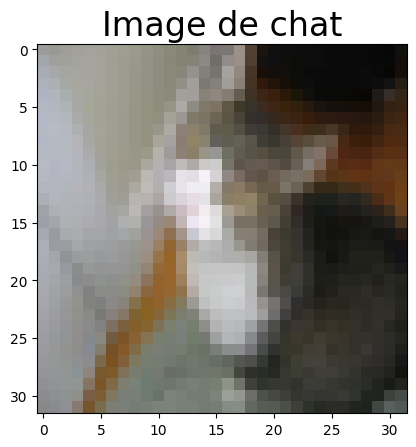

In [6]:
num = 101  # vous pouvez essayer d'autres num
image = x_train[num]
label = y_train[num]
plt.imshow(image, cmap='Greys')
plt.title('Image de %s' %noms_classes[label[0]], fontsize=24)
plt.show()

**Question 1:** En quelle dimension sont nos données ? 

Les données sont en dimensions (32, 32, 3)

---

**Question 2:** En reprenant le code de la Partie précédente, instanciez, entraînez puis évaluez un modèle fully-connected sur ce jeu de données.

**Important :** Le premier layer sera `tf.keras.layers.flatten()`, qui permet simplement de passer d'une image $32 \times 32 \times 3$ à un vecteur "ligne" (le type d'entrée que demande `tensorflow`). Le dernier avec une sortie de taille 10 (nombre de classes). 

Ne vous acharnez pas trop : avec un jeu de données difficile comme celui-ci, on se fixe dans un premier temps un objectif de $> 35\%$ de train **et** test accuracy. 


_Remarque :_ Comme le jeu de donnée est nettement plus gros, on peut généralement faire moins d'epochs (car 1 epoch ==> plus d'étapes de SGD à batch size fixée). Par contre les epochs seront plus longues. Commencez par en faire un petit nombre ($< 5$) pour voir ce que ça donne sur votre machine. 

_Remarque 2:_ Attention à l'overfiting ! En grande dimension, c'est très facile d'_overfit_. 

In [308]:
model_CIFAR = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_CIFAR.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model_CIFAR.summary()

model_CIFAR.fit(x_train, y_train, epochs=4)

Model: "sequential_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_282 (Dense)               │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_283 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_284 (Dense)               │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,082 (777.66 KB)

 Trainable params: 199,082 (777.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2745 - loss: 2.0149
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3694 - loss: 1.7679
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3915 - loss: 1.6963
Epoch 4/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4112 - loss: 1.6503


In [311]:
loss, accuracy = model_CIFAR.evaluate(x_test, y_test, verbose=2)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy * 100:.2f}%")

print()

loss, accuracy = model_CIFAR.evaluate(x_train, y_train, verbose=2)
print(f"Train loss: {loss:.4f}")
print(f"Train accuracy: {accuracy * 100:.2f}%")

313/313 - 1s - 2ms/step - accuracy: 0.4226 - loss: 1.6216
Test loss: 1.6216
Test accuracy: 42.26%

1563/1563 - 6s - 4ms/step - accuracy: 0.4281 - loss: 1.5976
Train loss: 1.5976
Train accuracy: 42.81%


---

**Question 3:** Combien votre modèle a-t-il de paramètres ?

Le modèle a **200 000** paramètres

--- 

L'espace des _images naturelles_ (les "vraies" images qu'on est susceptible de voir dans la vie de tous les jours) est trop compliqué pour être appris avec un réseau de neurones aussi élémentaire, qui traite chaque pixel (et chaque canal de couleur !) de manière totalement indépendante. On va donc se reposer sur un [layer _convolutionnel_](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D).

On y accède via :

```
tf.keras.layers.Conv2D(filters, kernel_size, activation, input_shape)
```

où `filters` représente le nombre de filtres (nombre de matrices $A$ vu en cours) qu'on veut apprendre en parallèle, `kernel_size` représente la taille de ces filtres, `activation` est la fonction d'activation (mêmes choix que précédemment), et `input_shape` (utile pour le premier layer uniquement) permet de spécifier la taille des images (nombre de pixel x nombre de pixel x nombre de canaux).

On utilisera aussi le layer `tf.keras.layers.MaxPooling2D((n,n))` qui découpe l'image en patch de taille `n x n` (où `n` est un paramètre que vous choisissez) 

---

**Question 4:** Instancier un réseau avec les layers suivants : 
- Le premier est un layer convolutionnel avec 16 filtres de taille `(3,3)`, une activation `'relu'`, et on précisera l'`input_shape`. 
- Le second est un `MaxPooling2D` avec `n=2`. 
- Le troisième est un layer convolutionnel avec 32 filtres de taille `(3,3)` et une activation `'relu'`. 
- Le quatrième est un layer `Flatten()` pour récupérer des vecteurs ligne.
- Le dernier est un layer `Dense` avec une sortie de taille 10, et une activation `'softmax'`. 

In [21]:
model_C2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

---

**Quesiton 5:** Compiler ce modèle, puis indiquer son nombre de paramètres. 

In [322]:
model_C2.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


model_C2.summary()

Model: "sequential_88"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_288 (Dense)               │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,178 (231.16 KB)

 Trainable params: 59,178 (231.16 KB)

 Non-trainable params: 0 (0.00 B)

Le modèle a **59 178** paramètres

---

**Question 6:** Entraînez et évaluez ce modèle sur le jeu de données `CIFAR10` en faisant 5 epochs. À quelle train et test accuracy arrivez-vous ? 

In [323]:
model_C2.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4046 - loss: 1.6404
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5741 - loss: 1.2186
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6214 - loss: 1.0778
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6582 - loss: 0.9817
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6841 - loss: 0.9070


In [324]:
loss, accuracy = model_C2.evaluate(x_test, y_test, verbose=2)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy * 100:.2f}%")

print()

loss, accuracy = model_C2.evaluate(x_train, y_train, verbose=2)
print(f"Train loss: {loss:.4f}")
print(f"Train accuracy: {accuracy * 100:.2f}%")

313/313 - 2s - 6ms/step - accuracy: 0.6530 - loss: 1.0018
Test loss: 1.0018
Test accuracy: 65.30%

1563/1563 - 5s - 3ms/step - accuracy: 0.7139 - loss: 0.8317
Train loss: 0.8317
Train accuracy: 71.39%


On obtient une `accuracy` de **65%** sur le jeu de test, et **71%** sur le jeu d'entrainement

---

**Question 7: (facultatif)** Améliorez ce modèle. Quelques points de repère : 
- Au dessus de $70\%$ : correct.
- Au dessus de $80\%$ : vraiment bien
- Au dessus de $85\%$ : très très bien
- Au dessus de $90\%$ : excellent, c'est plutôt un score qu'on atteint avec des méthodes plus sophistiquées d'habitude (comme les [ResNet](https://en.wikipedia.org/wiki/Residual_neural_network)). 
- Au dessus de $95\%$ : Hallucinant, ce sont des scores de modèles très récents de haut vol. 
- Au dessus de $99,2\%$ : nouveau record du monde !
- $100\%$ : Très douteux, sachant que [certains labels sont **faux**](https://franky07724-57962.medium.com/once-upon-a-time-in-cifar-10-c26bb056b4ce) (0.3% semble-t-il). 

In [45]:
model_C3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_C3.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


model_C3.summary()

model_C3.fit(x_train, y_train, epochs=5)

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_63 (Conv2D)              │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 13, 13, 128)    │        18,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 577,034 (2.20 MB)

 Trainable params: 577,034 (2.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3564 - loss: 1.7348
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5957 - loss: 1.1440
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6710 - loss: 0.9367
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7185 - loss: 0.8095
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7534 - loss: 0.7077


In [46]:
loss, accuracy = model_C3.evaluate(x_test, y_test, verbose=2)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy * 100:.2f}%")

print()

loss, accuracy = model_C3.evaluate(x_train, y_train, verbose=2)
print(f"Train loss: {loss:.4f}")
print(f"Train accuracy: {accuracy * 100:.2f}%")

313/313 - 1s - 3ms/step - accuracy: 0.7185 - loss: 0.8185
Test loss: 0.8185
Test accuracy: 71.85%

1563/1563 - 4s - 2ms/step - accuracy: 0.7928 - loss: 0.6019
Train loss: 0.6019
Train accuracy: 79.28%
